In [30]:
# Import Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

In [31]:
path = r"D:\DATA ANALYSIS FILE"
os.chdir(path)

In [32]:
# File name
file = 'Water Quality Data.csv'

In [33]:
# Load the CSV file with the appropriate encoding
df = pd.read_csv(file, encoding='ISO-8859-1') 

In [34]:
# Display the first 5 rows of the dataset
print("Head of the dataset:")
print(df.head(20))

Head of the dataset:
    Salinity (ppt)  Dissolved Oxygen (mg/L)  pH (standard units)  \
0              1.3                     11.7                  7.3   
1              1.5                     12.0                  7.4   
2              1.0                     10.5                  7.2   
3              1.0                     10.1                  7.4   
4              1.0                      9.9                  7.1   
5              0.5                     10.4                  7.2   
6              1.0                      9.2                  7.1   
7              1.0                      9.2                  7.2   
8              1.0                      8.6                  7.3   
9              1.0                      8.8                  7.6   
10             1.0                     10.0                  7.9   
11             1.3                      9.8                  7.5   
12             1.0                     10.1                  7.9   
13             1.0         

In [35]:
# Calculate statistics
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
quartiles = df.quantile([0.25, 0.5, 0.75], numeric_only=True)
std_dev = df.std(numeric_only=True)

<h3> Print statistics

In [36]:
print("Mean of the dataset:")
print(mean)

Mean of the dataset:
Salinity (ppt)              1.032500
Dissolved Oxygen (mg/L)     8.393333
pH (standard units)         7.558333
Secchi Depth (m)            0.457500
Water Depth (m)             0.785833
Water Temp (Degree C)      16.260000
Air Temp-Celsius           16.746667
Air Temp ( Degree F)       59.777333
AirTemp ( Degree C)        15.431852
dtype: float64


In [37]:
print("\nMedian of the dataset:")
print(median)


Median of the dataset:
Salinity (ppt)              1.000000
Dissolved Oxygen (mg/L)     8.900000
pH (standard units)         7.250000
Secchi Depth (m)            0.350000
Water Depth (m)             0.750000
Water Temp (Degree C)      15.850000
Air Temp-Celsius           16.000000
Air Temp ( Degree F)       59.680000
AirTemp ( Degree C)        15.377778
dtype: float64


In [38]:
print("\nQuartiles of the dataset:")
print(quartiles)


Quartiles of the dataset:
      Salinity (ppt)  Dissolved Oxygen (mg/L)  pH (standard units)  \
0.25             0.0                     7.05                 7.00   
0.50             1.0                     8.90                 7.25   
0.75             2.0                    10.00                 8.10   

      Secchi Depth (m)  Water Depth (m)  Water Temp (Degree C)  \
0.25              0.25             0.50                 10.000   
0.50              0.35             0.75                 15.850   
0.75              0.45             0.90                 22.025   

      Air Temp-Celsius  Air Temp ( Degree F)  AirTemp ( Degree C)  
0.25             9.375                 48.00             8.888889  
0.50            16.000                 59.68            15.377778  
0.75            22.100                 71.78            22.100000  


In [39]:
print("\nStandard deviation of the dataset:")
print(std_dev)


Standard deviation of the dataset:
Salinity (ppt)              0.983673
Dissolved Oxygen (mg/L)     2.204684
pH (standard units)         0.892586
Secchi Depth (m)            0.448049
Water Depth (m)             0.482937
Water Temp (Degree C)       7.258571
Air Temp-Celsius           10.555960
Air Temp ( Degree F)       14.144258
AirTemp ( Degree C)         7.857921
dtype: float64


<h2> Data Visualization

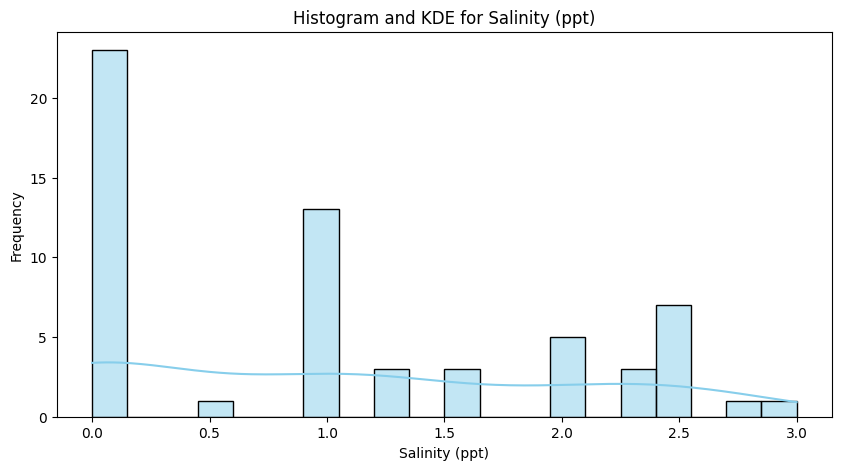

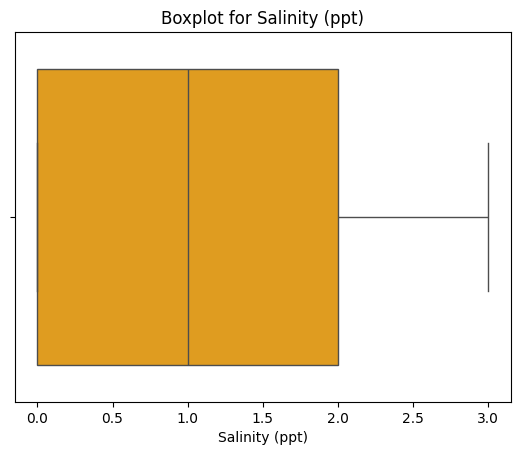

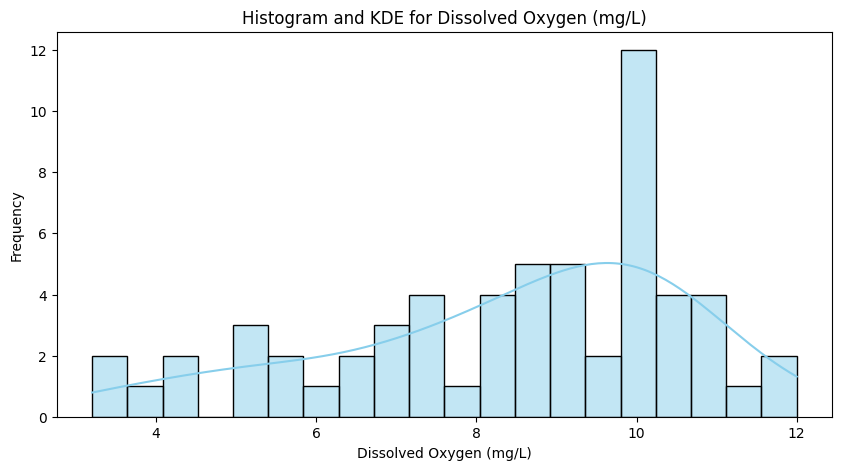

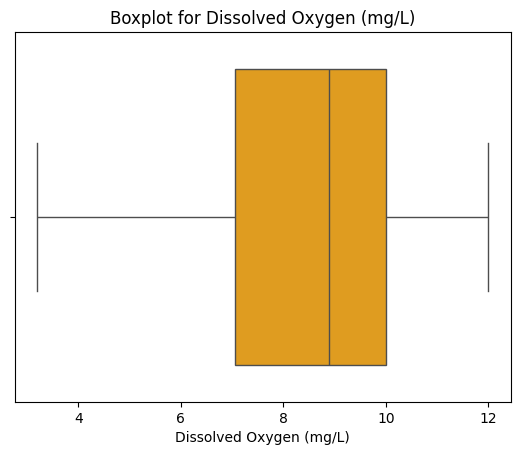

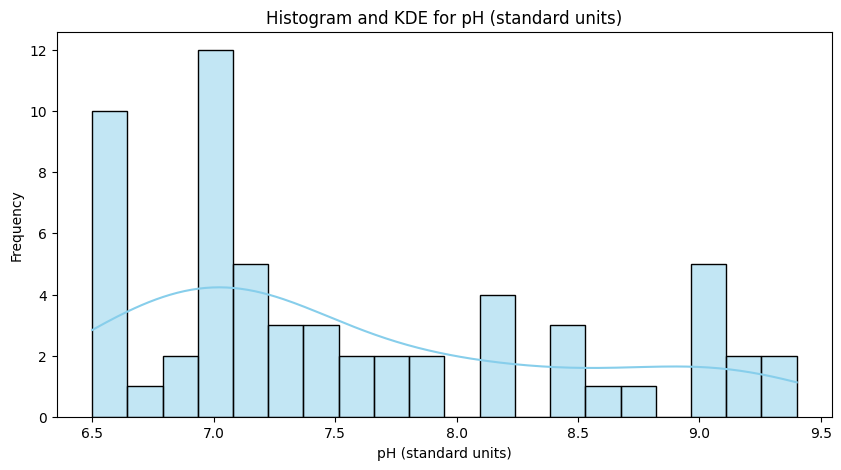

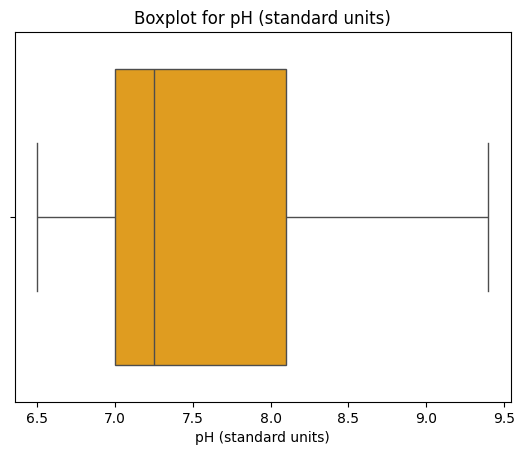

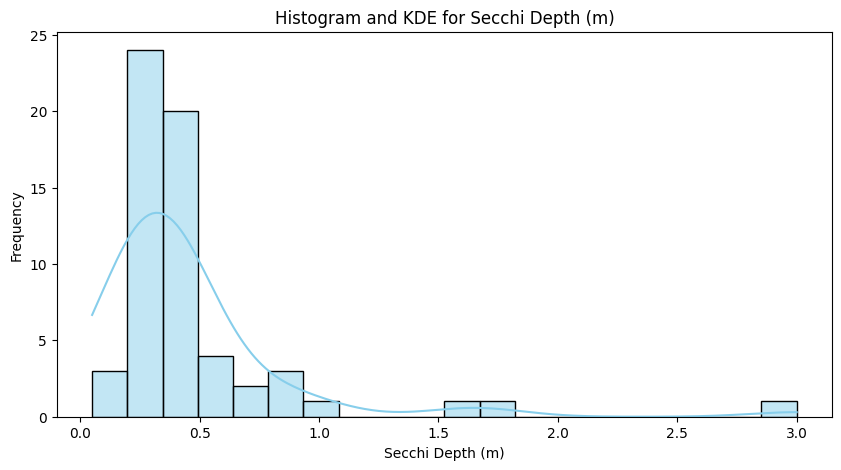

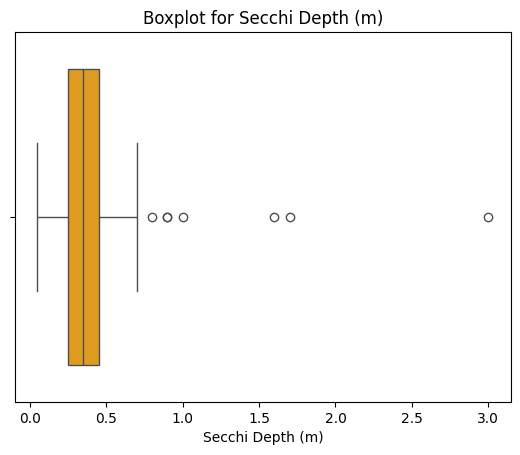

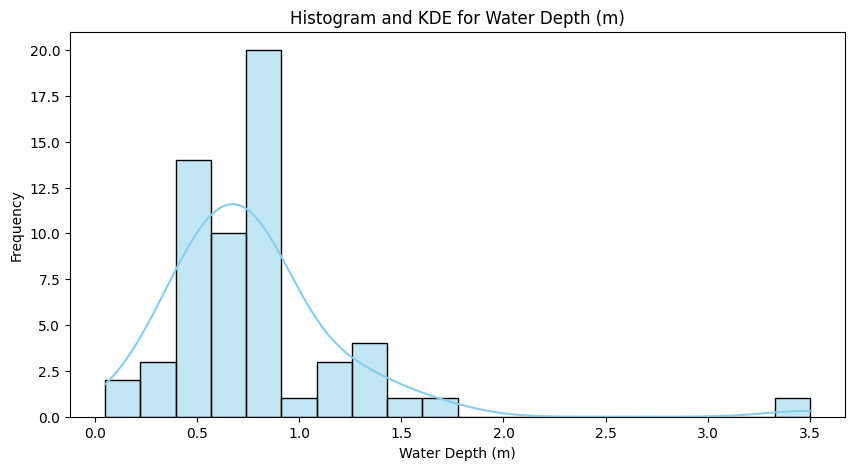

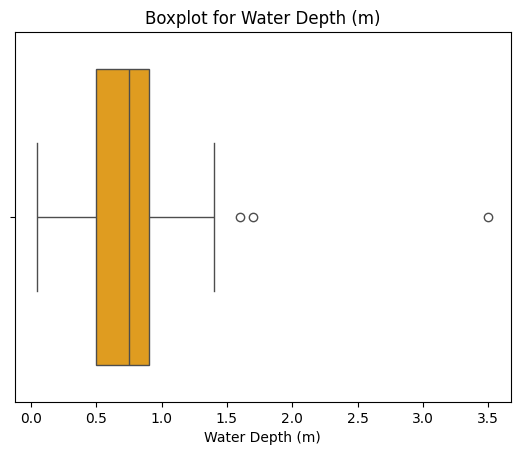

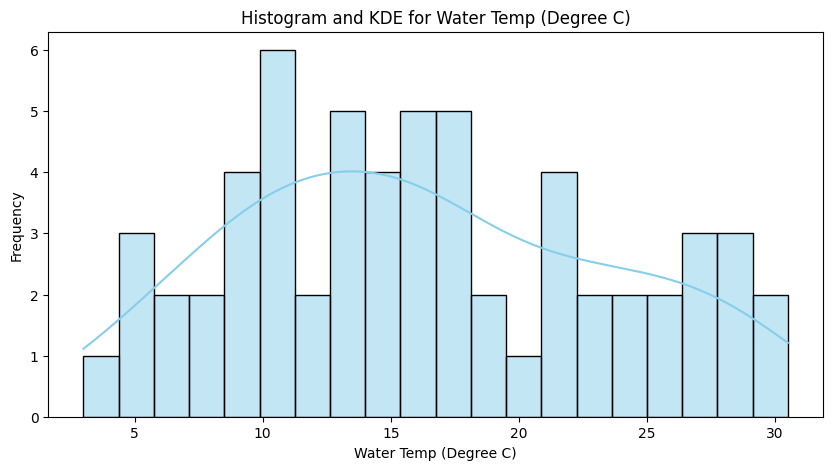

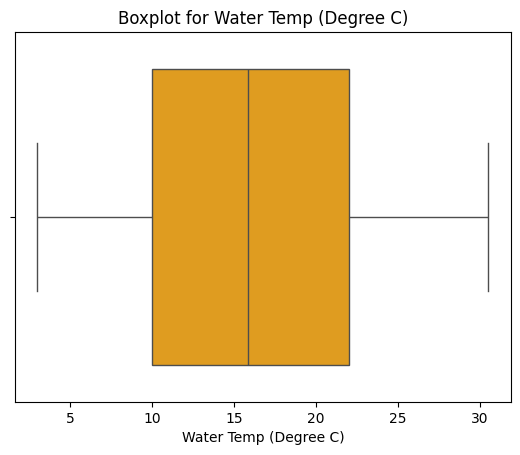

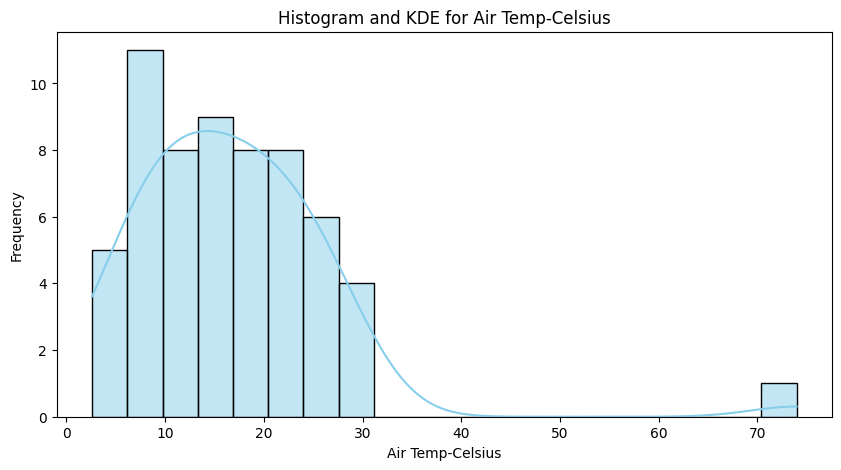

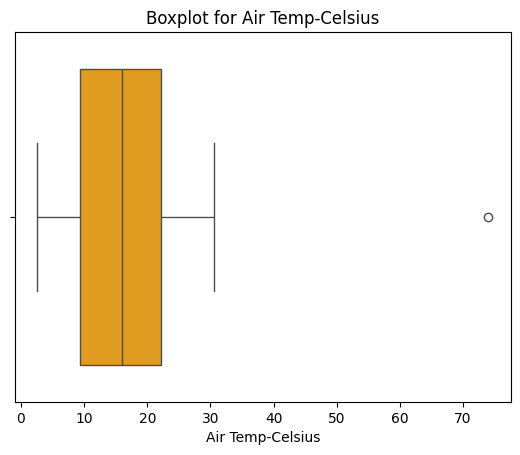

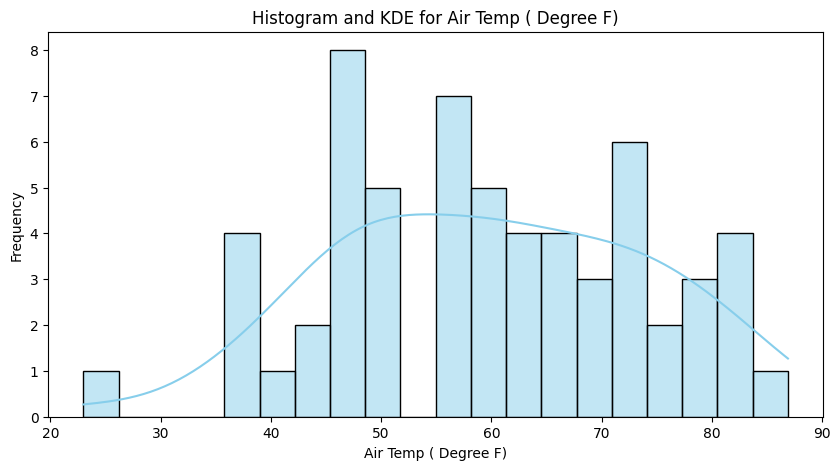

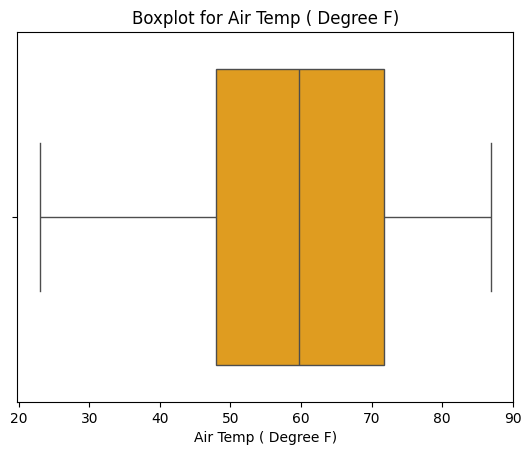

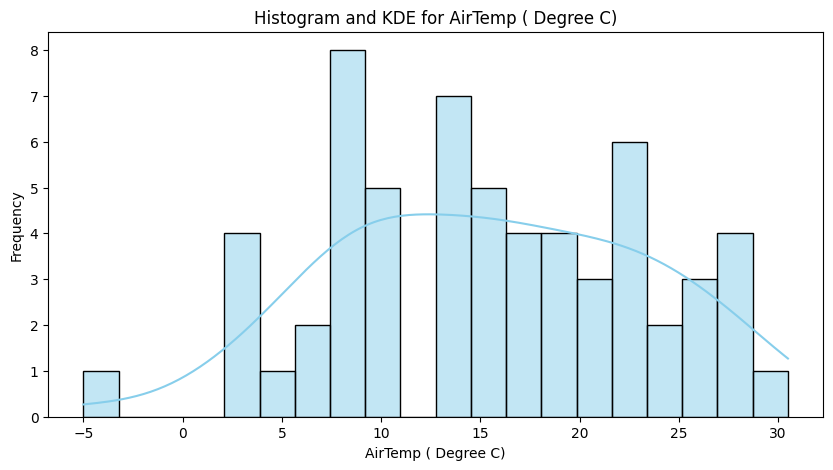

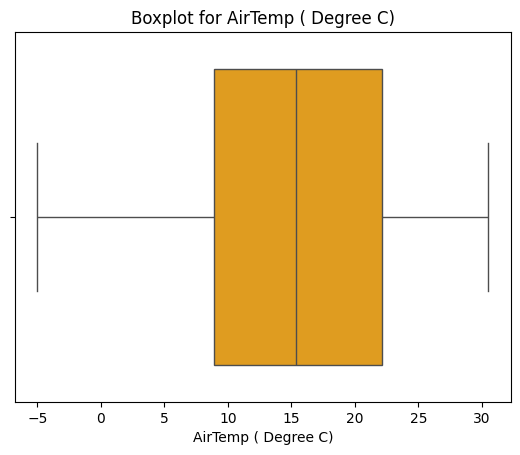


Normality Test Results (Shapiro-Wilk Test):
                         Test Statistic       P-value
Salinity (ppt)                 0.853222  3.796538e-06
Dissolved Oxygen (mg/L)        0.936540  3.804140e-03
pH (standard units)            0.890947  6.253041e-05
Secchi Depth (m)               0.572766  6.039052e-12
Water Depth (m)                0.735403  4.554370e-09
Water Temp (Degree C)          0.966108  9.392319e-02
Air Temp-Celsius               0.791545  8.361925e-08
Air Temp ( Degree F)           0.979796  4.199549e-01
AirTemp ( Degree C)            0.979796  4.199549e-01

Interpretation:
If the p-value < 0.05, the data is not normally distributed.


In [40]:
# Columns for analysis
columns = ['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)', 
           'Secchi Depth (m)', 'Water Depth (m)', 'Water Temp (Degree C)',
           'Air Temp-Celsius', 'Air Temp ( Degree F)', 'AirTemp ( Degree C)']

# Data Visualization
for col in columns:
    plt.figure(figsize=(10, 5))

    # Histogram with KDE
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f"Histogram and KDE for {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

# Normality Test
normality_results = {}
for col in columns:
    stat, p_value = shapiro(df[col])
    normality_results[col] = {'Test Statistic': stat, 'P-value': p_value}

# Display Normality Test Results
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')
print("\nNormality Test Results (Shapiro-Wilk Test):")
print(normality_df)

# Interpretation
print("\nInterpretation:")
print("If the p-value < 0.05, the data is not normally distributed.")


#### Since the datasets are non-parametric. Hence, we are doing Spearman's rank correlation coefficient

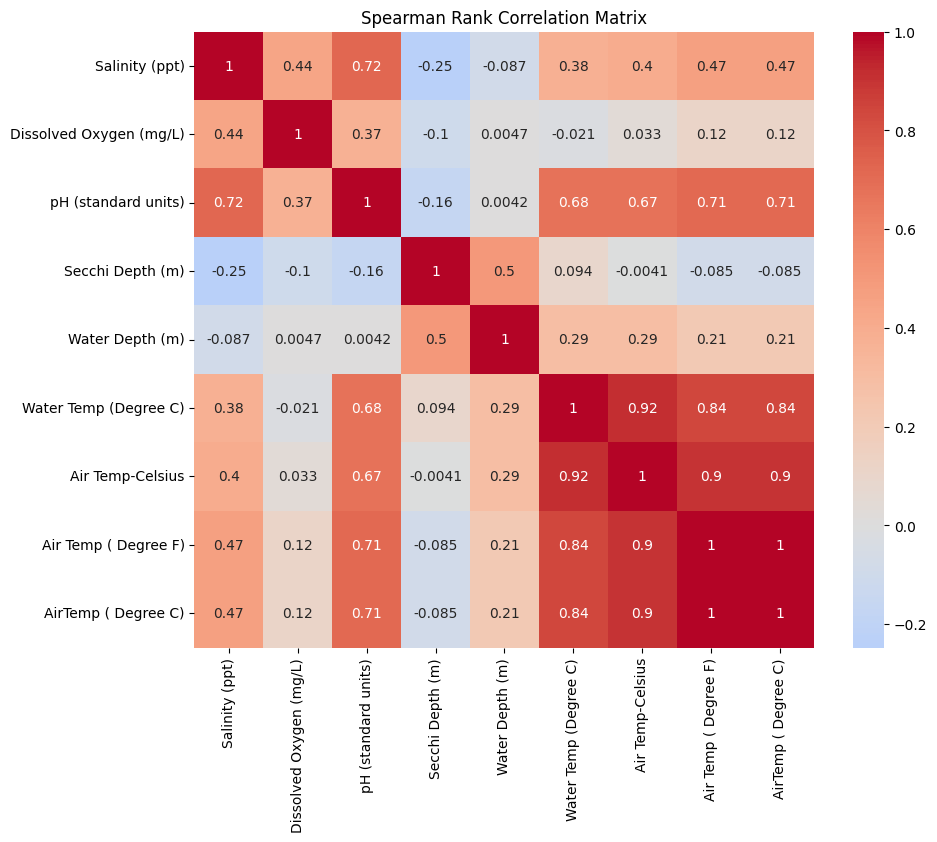


Spearman Rank Correlation Coefficients:
                         Salinity (ppt)  Dissolved Oxygen (mg/L)  \
Salinity (ppt)                 1.000000                 0.444065   
Dissolved Oxygen (mg/L)        0.444065                 1.000000   
pH (standard units)            0.722431                 0.369759   
Secchi Depth (m)              -0.247470                -0.102160   
Water Depth (m)               -0.087095                 0.004703   
Water Temp (Degree C)          0.380206                -0.021131   
Air Temp-Celsius               0.402126                 0.033339   
Air Temp ( Degree F)           0.467369                 0.117519   
AirTemp ( Degree C)            0.467369                 0.117519   

                         pH (standard units)  Secchi Depth (m)  \
Salinity (ppt)                      0.722431         -0.247470   
Dissolved Oxygen (mg/L)             0.369759         -0.102160   
pH (standard units)                 1.000000         -0.160664   
Secchi Depth (

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns for analysis
columns = ['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)', 
           'Secchi Depth (m)', 'Water Depth (m)', 'Water Temp (Degree C)',
           'Air Temp-Celsius', 'Air Temp ( Degree F)', 'AirTemp ( Degree C)']

# Calculate Spearman rank correlation for the selected columns
spearman_corr = df[columns].corr(method='spearman')

# Display correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Rank Correlation Matrix')
plt.show()

# Optional: Display the correlation values in a DataFrame
print("\nSpearman Rank Correlation Coefficients:")
print(spearman_corr)


<h2> Creating a model on doing regression analysis between Salinity and other variables

In [68]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway

# Independent Variable
X = df[['Salinity (ppt)']]

# Add a constant for the regression model (including the intercept)
X = sm.add_constant(X)

# List of dependent variables
dependent_vars = [
    'Dissolved Oxygen (mg/L)', 
    'pH (standard units)', 
    'Secchi Depth (m)', 
    'Water Depth (m)', 
    'Water Temp (Degree C)', 
    'Air Temp-Celsius', 
    'Air Temp ( Degree F)', 
    'AirTemp ( Degree C)'
]

# Perform Regression for each dependent variable
for var in dependent_vars:
    y = df[var]
    model = sm.OLS(y, X).fit()
    print(f"Regression Analysis for '{var}':\n", model.summary(), "\n")


Regression Analysis for 'Dissolved Oxygen (mg/L)':
                                OLS Regression Results                              
Dep. Variable:     Dissolved Oxygen (mg/L)   R-squared:                       0.219
Model:                                 OLS   Adj. R-squared:                  0.206
Method:                      Least Squares   F-statistic:                     16.29
Date:                     Tue, 19 Nov 2024   Prob (F-statistic):           0.000161
Time:                             11:17:09   Log-Likelihood:                -124.64
No. Observations:                       60   AIC:                             253.3
Df Residuals:                           58   BIC:                             257.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

**The model explains a moderate relationship between Salinity and pH value whereas weak relationship between Salinity and other variables.**